# Creating and applying your own filter

OpenCV's `cv2.filter2d` function takes an input image, output result datatype, OpenCV ID ($-1$, if you want to keep the input image datatype), and filter kernel; then, image is filtered linearly.
In this recipe, we constructed a sharpening kernel that should emphasize high frequencies in the source image. 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512, 3) image: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]


<Figure size 432x432 with 0 Axes>

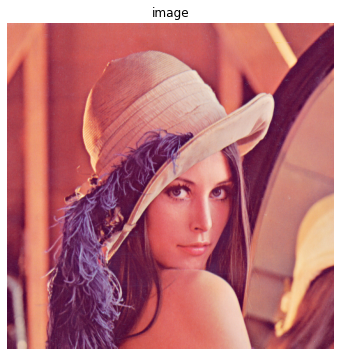

In [2]:
image = cv2.imread('data/Lena.png')



##################################################
print_image('Original','image',image,0,1,0,7)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]]    ])

In [3]:
# Create an 11x11 sharpening kernel
KSIZE = 11
ALPHA = 2

kernel_11_getGaussianKernel = cv2.getGaussianKernel(KSIZE, 0)


###########################################
print("cv2.getGaussianKernel(KSIZE, 0) ==",kernel_11_getGaussianKernel.shape)
for i in kernel_11_getGaussianKernel: print("{0:.8f}".format(i[0]) , end =" ")

cv2.getGaussianKernel(KSIZE, 0) == (11, 1)
0.00881223 0.02714358 0.06511406 0.12164907 0.17699836 0.20056541 0.17699836 0.12164907 0.06511406 0.02714358 0.00881223 

[[0.00881223]
 [0.02714358]
 [0.06511406]
 [0.12164907]
 [0.17699836]
 [0.20056541]
 [0.17699836]
 [0.12164907]
 [0.06511406]
 [0.02714358]
 [0.00881223]]


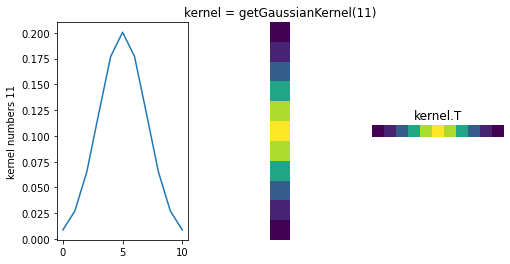

In [4]:
print(kernel_11_getGaussianKernel)

plt.figure(figsize=(8,4))
plt.subplot(131)
plt.plot(kernel_11_getGaussianKernel)
plt.ylabel('kernel numbers 11')
plt.subplot(132)
plt.axis('off')
plt.title('kernel = getGaussianKernel(11)')
plt.imshow(kernel_11_getGaussianKernel)
plt.subplot(133)
plt.axis('off')
plt.title('kernel.T')
plt.imshow(kernel_11_getGaussianKernel.T)
plt.show()

In [5]:
kernel = - ALPHA * kernel_11_getGaussianKernel @ kernel_11_getGaussianKernel.T


################################################
print_image('kernel == -{0} * kernel @ kernel.T'.format(ALPHA),'kernel',kernel,6,7,0,12)

------  kernel == -2 * kernel @ kernel.T    Shape(11, 11) kernel: float64
[ -0.00311950020960933 -0.009608737105841985 -0.023050162049429255 -0.043063372067003836 -0.06265683664199985 -0.07099949751494297 -0.06265683664199985 -0.043063372067003836 -0.023050162049429255 -0.009608737105841985 -0.00311950020960933 ]


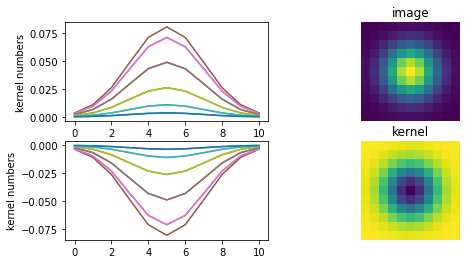

In [6]:
kernel_Plus = ALPHA * kernel_11_getGaussianKernel @ kernel_11_getGaussianKernel.T

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.plot(kernel_Plus)
plt.ylabel('kernel numbers')
plt.subplot(222)
plt.axis('off')
plt.title('image')
plt.imshow(kernel_Plus)
plt.subplot(223)
plt.plot(kernel)
plt.ylabel('kernel numbers')
plt.subplot(224)
plt.axis('off')
plt.title('kernel')
plt.imshow(kernel)
plt.show()

In [7]:
kernel[KSIZE//2, KSIZE//2] += 1 + ALPHA

kernel.sum()== 0.9999999999999992
-0.003120 -0.009609 -0.023050 -0.043063 -0.062657 -0.070999 -0.062657 -0.043063 -0.023050 -0.009609 -0.003120 
-0.003535 -0.010888 -0.026119 -0.048797 -0.070999 +2.919547 -0.070999 -0.048797 -0.026119 -0.010888 -0.003535 
-0.003120 -0.009609 -0.023050 -0.043063 -0.062657 -0.070999 -0.062657 -0.043063 -0.023050 -0.009609 -0.003120 


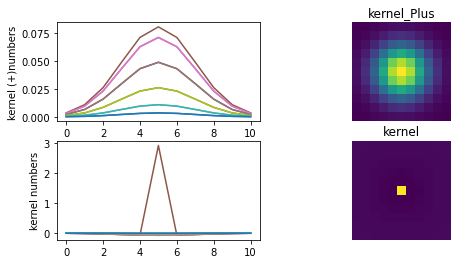

In [8]:
print("kernel.sum()==",kernel.sum())

for i in [4,5,6]:
    for j in kernel[i]: 
        print("{0:+.6f}".format(j) , end =" ")
    print()

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.plot(kernel_Plus)
plt.ylabel('kernel (+)numbers')
plt.subplot(222)
plt.axis('off')
plt.title('kernel_Plus')
plt.imshow(kernel_Plus)
plt.subplot(223)
plt.plot(kernel)
plt.ylabel('kernel numbers')
plt.subplot(224)
plt.axis('off')
plt.title('kernel')
plt.imshow(kernel)
plt.show()

------  Original-----------------    Shape(512, 512, 3) image: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] ]
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] ]
------  Filtered 11*11-----------    Shape(512, 512, 3) filtered: uint8
[ [121 137 228] [122 138 228] [147 138 219] [134 136 219] [113 143 227] ]
[ [122 137 228] [122 138 228] [147 138 219] [135 136 219] [113 143 227] ]


<Figure size 432x432 with 0 Axes>

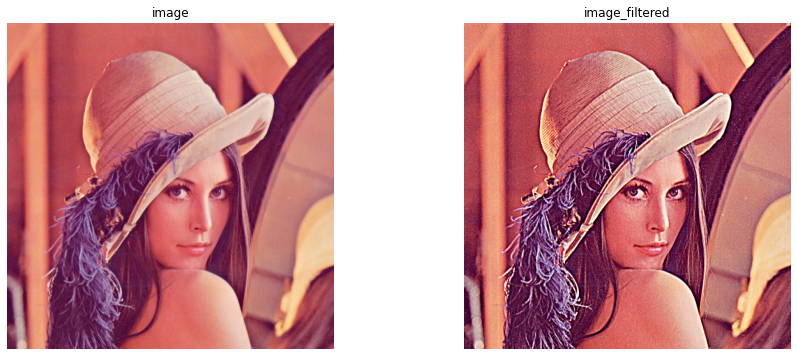

In [9]:
# OpenCV's cv2.filter2d function takes 
# an input image, output result datatype, OpenCV ID and filter kernel 
# then, image is filtered linearly.

image_filtered = cv2.filter2D(image, -1, kernel)


############################################################
print_image('Original','image',image,0,2,0,5)
print_image('Filtered 11*11','filtered',image_filtered,0,2,0,5)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_filtered",image_filtered[:,:,[2,1,0]]]    
                   ])

cv2.imshow('image before  -> image after filtered =getGaussianKernel(11,...)', 
           np.hstack([image, image_filtered]))
cv2.waitKey()
cv2.destroyAllWindows()